# Importando Bibliotecas

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [143]:
df = pd.read_csv(r"C:\Users\dpaul\OneDrive\Documentos\Heroes_Case_Alelo\Dataset\Treated\treated_data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
1,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
2,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
3,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 176 entries, hero_names to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 60.6+ KB


In [145]:
df.describe(percentiles=[.25, .50, .75, .80, .85, .90, .95, .97, .99, .999, .9999])

,Height,Weight
count,259.000000,259.000000
mean,186.557915,112.116787
std,55.959760,96.814712
min,30.500000,17.000000
25%,175.000000,63.000000
50%,183.000000,83.000000
75%,191.000000,106.000000
80%,193.000000,126.800000
85%,196.600000,158.000000
90%,201.000000,193.400000


<br>

# 1 - Abordagem de Clustering

In [146]:
df = pd.get_dummies(df, columns=['Gender', 'Eye color', 'Race',
                                     'Hair color','Publisher','Alignment'],
                      drop_first=True)
df.replace(0, False, inplace=True)
df.replace(1, True, inplace=True)
df.head()

,hero_names,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_Strawberry Blond,Hair color_White,Hair color_black,Hair color_blond,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Image Comics,Publisher_Marvel Comics,Publisher_Star Trek,Alignment_good
0,Abe Sapien,191.0,65.0,True,True,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,True
1,Abin Sur,185.0,90.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Abomination,203.0,441.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Absorbing Man,193.0,122.0,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
4,Adam Strange,185.0,88.0,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [147]:
df.head()

,hero_names,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_Strawberry Blond,Hair color_White,Hair color_black,Hair color_blond,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Image Comics,Publisher_Marvel Comics,Publisher_Star Trek,Alignment_good
0,Abe Sapien,191.0,65.0,True,True,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,True
1,Abin Sur,185.0,90.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Abomination,203.0,441.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Absorbing Man,193.0,122.0,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
4,Adam Strange,185.0,88.0,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [148]:
# Pearson Correlation
df_corr = df.copy()
df_corr = df_corr.drop(columns=["hero_names"])

corr_matrix = df_corr.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

In [149]:
# corr_matrix = corr_matrix.stack()
power_cols = df_corr.columns[3:168].tolist()

for idx, x in corr_matrix.stack().sort_values(ascending=False).items():
    if (idx[1] in power_cols) and (idx[0] not in power_cols):
        print(idx, x)

('Race_Talokite', 'Darkforce Manipulation') 1.0
('Race_Symbiote', 'Symbiote Costume') 0.9239886042108222
('Publisher_George Lucas', 'The Force') 0.8643322928712083
('Race_Kryptonian', 'Vision - Heat') 0.7514691493021795
('Race_Symbiote', 'Web Creation') 0.7142474745362399
('Eye color_green / blue', 'Adaptation') 0.7057350887577264
('Race_Human / Cosmic', 'Nova Force') 0.7057350887577263
('Hair color_Orange', 'Power Cosmic') 0.7057350887577262
('Race_Symbiote', 'Camouflage') 0.6714978657389704
('Race_Kryptonian', 'Vision - Microscopic') 0.6600983619844496
('Race_Kryptonian', 'Super Breath') 0.62497058754322
('Race_Atlantean', 'Water Control') 0.6236998271743315
('Publisher_George Lucas', 'Cloaking') 0.6051443802888012
('Race_Symbiote', 'Wallcrawling') 0.6001482030404224
('Race_Atlantean', 'Underwater breathing') 0.5869311620423449
('Race_Symbiote', 'Danger Sense') 0.5810300404698439
('Race_Kakarantharaian', 'Possession') 0.5751081237516719
('Eye color_green / blue', 'Power Absorption') 

<Axes: >

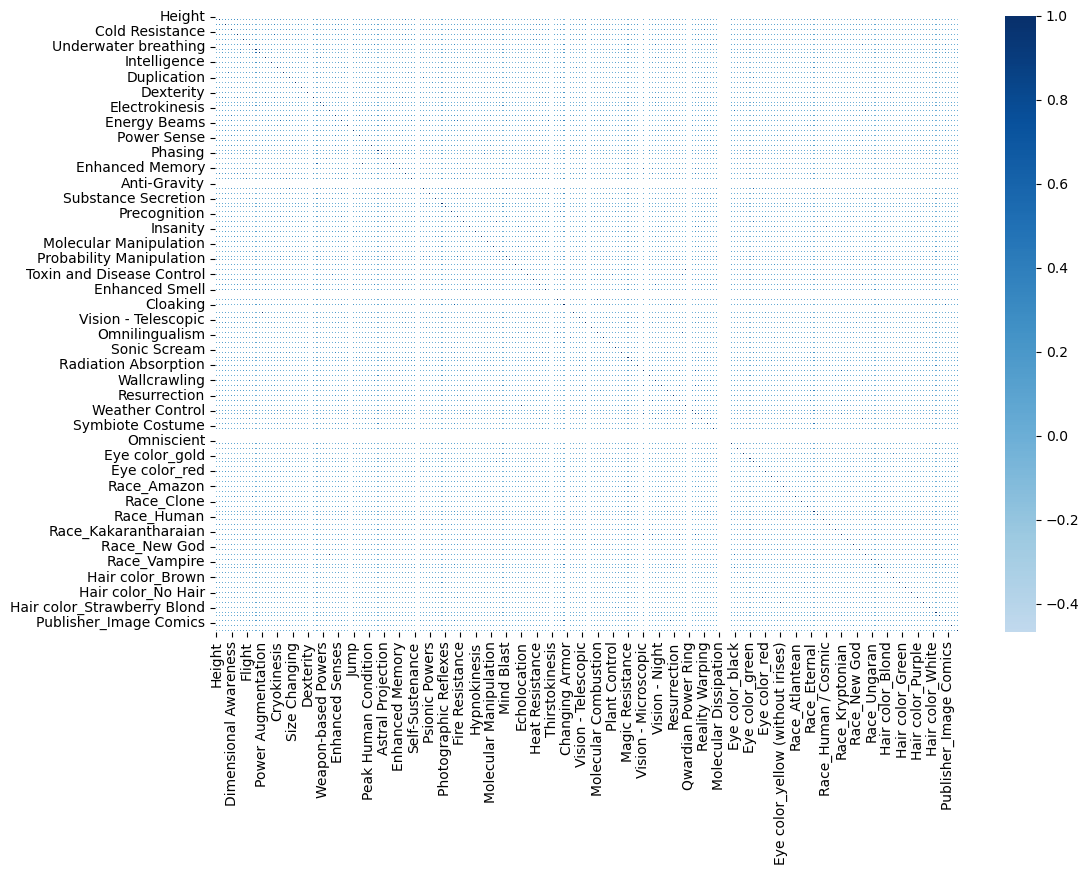

In [150]:
corr = df_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues', center=0,linewidths=.1)

In [ ]:
squared_dist_sum = []
k_list = range(1,60)
for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model = km_model.fit(df.drop('hero_names', axis=1))
    squared_dist_sum.append(km_model.inertia_)

c:\Users\dpaul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dpaul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dpaul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\dpaul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

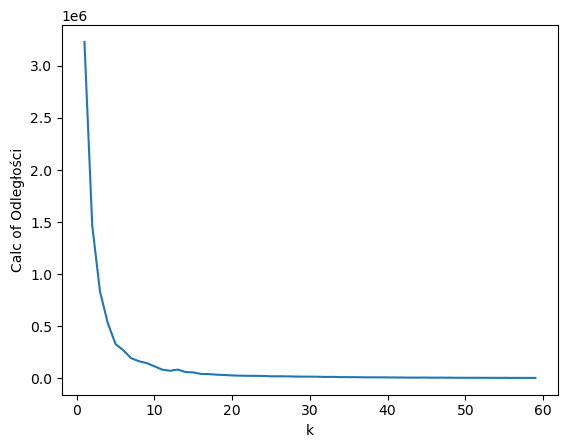

In [152]:
plt.plot(k_list, squared_dist_sum)
plt.xlabel('k')
plt.ylabel('Calc of Odległości')
plt.show()

O método de elbow nos retorna o ponto em que a distribuição dos registros deixa de estar em inércia. O ideal é selecionar a quantidade de clusters exatamente quando a curva se assentua, formando um desenho de um cotovelo. Nesse caso, o melhor cluster fica entre 4 e 5. Então é interessante testarmos ambas as quantidades.

In [153]:
km_model = KMeans(5)
km_model = km_model.fit(df.drop('hero_names',axis=1))

clusters = km_model.predict(df.drop('hero_names',axis=1))
df['Cluster'] = clusters
df[df['Cluster']==0].head()

c:\Users\dpaul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,hero_names,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_White,Hair color_black,Hair color_blond,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Image Comics,Publisher_Marvel Comics,Publisher_Star Trek,Alignment_good,Cluster
1,Abin Sur,185.0,90.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
3,Absorbing Man,193.0,122.0,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,False,False,0
4,Adam Strange,185.0,88.0,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,0
6,Ajax,193.0,90.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
7,Ammo,188.0,101.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 259 samples in 0.002s...
[t-SNE] Computed neighbors for 259 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 259 / 259
[t-SNE] Mean sigma: 5.234149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.747036
[t-SNE] KL divergence after 1000 iterations: 0.166590


C:\Users\dpaul\AppData\Local\Temp\ipykernel_21828\490427781.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


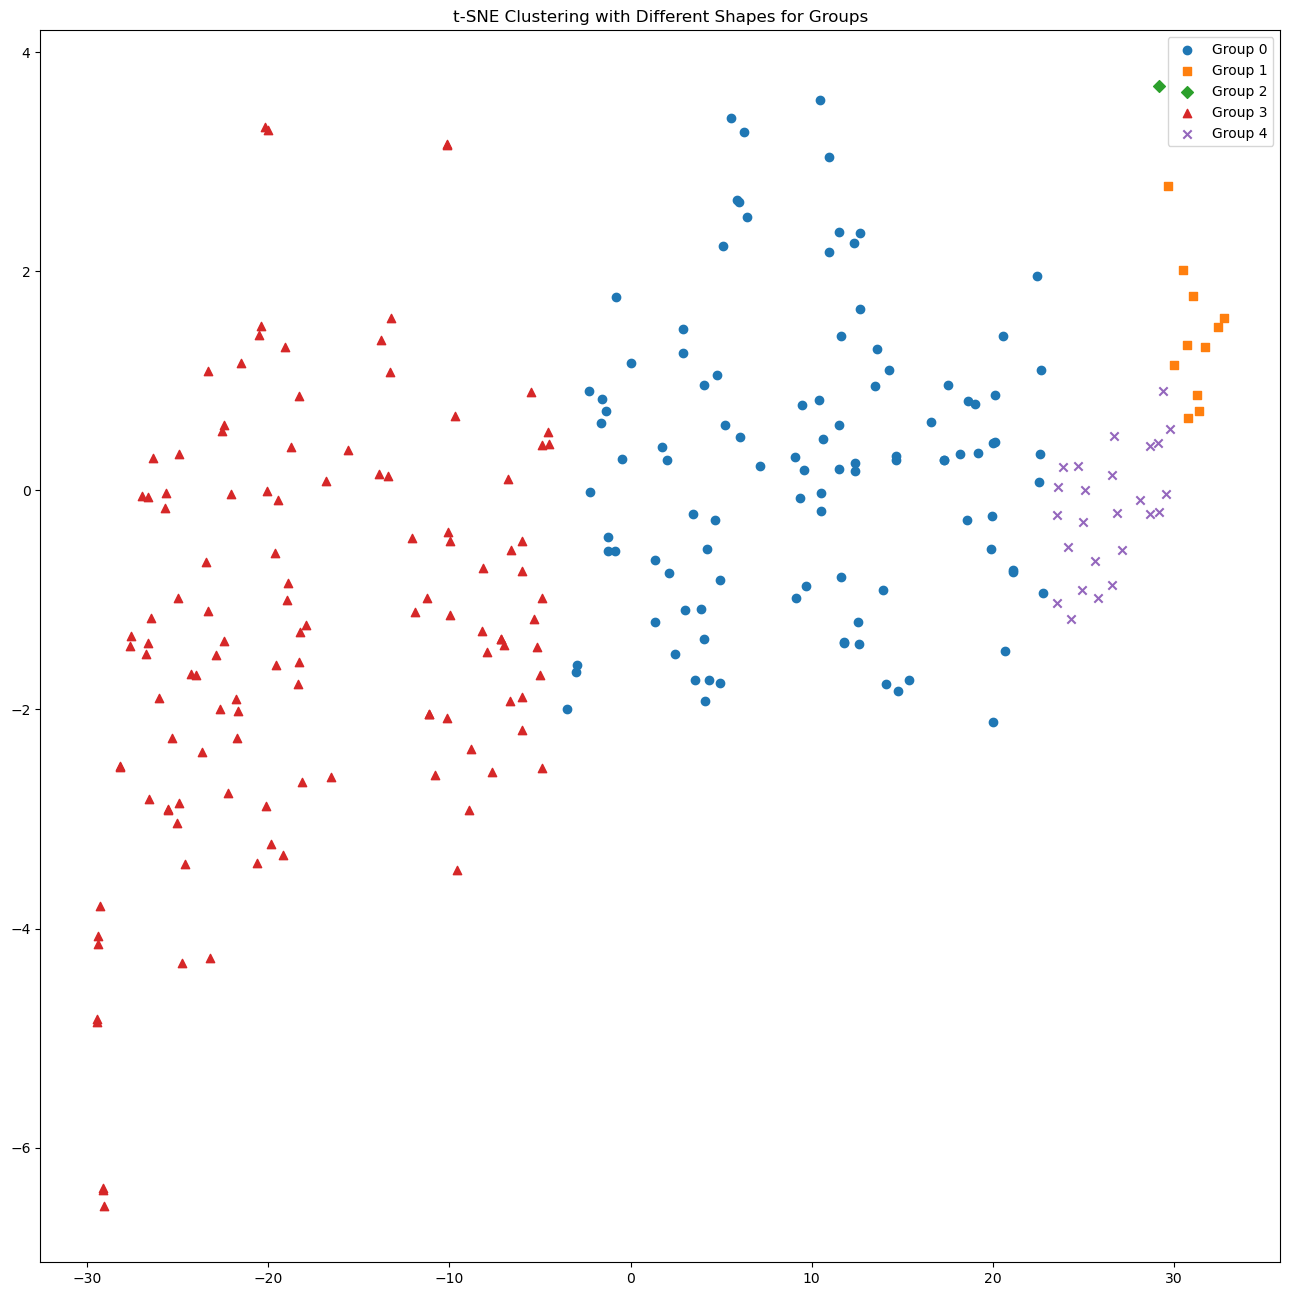

In [154]:

# Set random seed for reproducibility
np.random.seed(1)

# Perform t-SNE
tsne_clusters = TSNE(perplexity=27, verbose=1)
tsne_results = tsne_clusters.fit_transform(df.drop('hero_names', axis=1))

# Define unique labels and markers for each group
unique_labels = np.unique(km_model.labels_)
markers = ['o', 's', 'D', '^', 'x']  # List of markers for different shapes

# Plotting
plt.figure(figsize=(16, 16))
for i, label in enumerate(unique_labels):
    # Select points belonging to the current label
    label_points = tsne_results[km_model.labels_ == label]
    plt.scatter(
        label_points[:, 0],
        label_points[:, 1],
        marker=markers[i % len(markers)],  # Cycle through markers
        label=f"Group {label}",
        cmap='plasma'
    )

plt.legend()
plt.title("t-SNE Clustering with Different Shapes for Groups")
plt.show()

In [155]:
df[df["Cluster"] == 4]

,hero_names,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_White,Hair color_black,Hair color_blond,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Image Comics,Publisher_Marvel Comics,Publisher_Star Trek,Alignment_good,Cluster
27,Beast,180.0,181.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,4
62,Citizen Steel,183.0,170.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,4
63,Colossus,226.0,225.0,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,4
66,Cyborg,198.0,173.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,4
77,Deathlok,193.0,178.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,4
80,Doc Samson,198.0,171.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,4
81,Doctor Doom,201.0,187.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,4
88,Drax the Destroyer,193.0,306.0,True,True,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,4
106,Gorilla Grodd,198.0,270.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,4
117,Hela,213.0,225.0,True,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,4


<Axes: ylabel='count'>

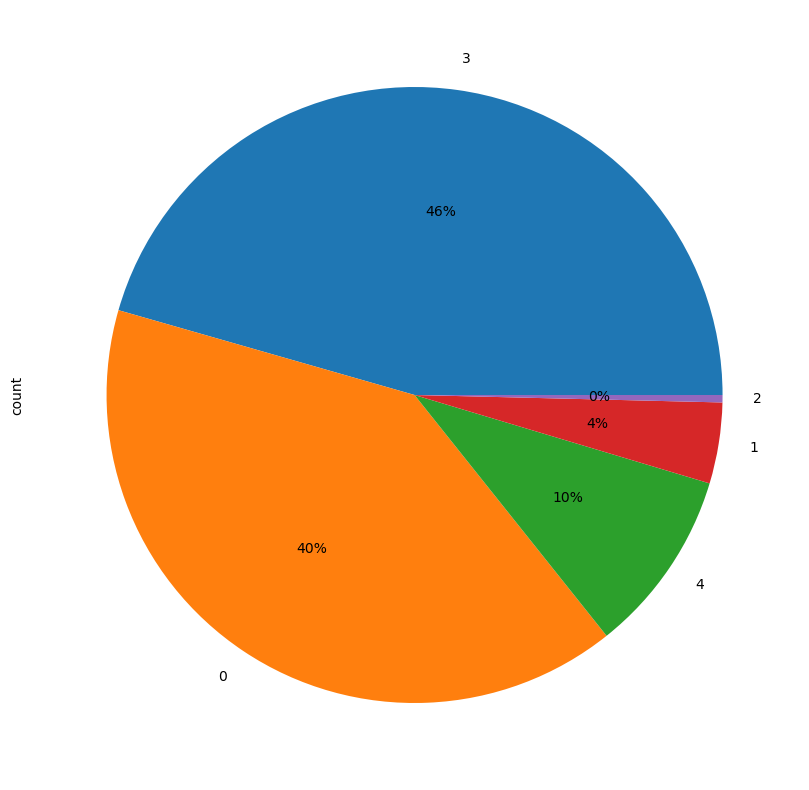

In [156]:
# Distribution of clusters
df['Cluster'].value_counts().plot.pie(figsize=(10,10),autopct='%1.f%%')

In [157]:
for i in range(df['Cluster'].nunique()):
    print("Cluster no: {}".format(i))
    
    group_members = df[df['Cluster'] == i]
    group_members_count = group_members.shape[0]  # Number of superheroes in the cluster
    
    print("Representatives: ", end=' ')
    
    reprs_count = min(5, group_members_count)  # Get up to 5 representatives
    for j in range(reprs_count):
        print(group_members.iloc[j]['hero_names'], end='; ')
    print('')
    
    # Exclude 'Weight' and 'Height' from the summation
    super_powers = group_members.drop(['hero_names', 'Cluster', 'Weight', 'Height'], axis=1).sum().to_dict()
    super_powers = sorted(super_powers.items(), key=lambda x: x[1], reverse=True)
    
    print('Most common skills with percentage of occurrence:')
    for super_power in super_powers[:5]:
        percentage = (super_power[1] / group_members_count) * 100  # Correct percentage calculation
        print(f"{super_power[0]} --> {percentage:.0f}%")
    print('##############################################################################')


Cluster no: 0
Representatives:  Abin Sur; Absorbing Man; Adam Strange; Ajax; Ammo; 
Most common skills with percentage of occurrence:
Gender_Male --> 96%
Publisher_Marvel Comics --> 64%
Alignment_good --> 64%
Super Strength --> 63%
Stamina --> 60%
##############################################################################
Cluster no: 1
Representatives:  Abomination; Bloodaxe; Darkseid; Doomsday; Hulk; 
Most common skills with percentage of occurrence:
Super Strength --> 91%
Gender_Male --> 91%
Stamina --> 82%
Invulnerability --> 82%
Agility --> 73%
##############################################################################
Cluster no: 2
Representatives:  Fin Fang Foom; 
Most common skills with percentage of occurrence:
Accelerated Healing --> 100%
Durability --> 100%
Flight --> 100%
Longevity --> 100%
Super Strength --> 100%
##############################################################################
Cluster no: 3
Representatives:  Abe Sapien; Agent Bob; Angel Dust; Arachne; Ar

Podemos ver que os clusters estão sendo corretamente separados. Onde em cada um temos habilidades similares entre o grupo. Seguindo como exemplo, temos o cluster 2, onde todos os heróis possuem poderes de voar, longevidade e super força. Dessa forma, os agrupamentos estão retornando correspondencias similares entre os registros. Algo bem positivo para uma análise posterior.

<br>

## Importando a base limpa novamente para as próximas abordagens

In [158]:
df = pd.read_csv(r"C:\Users\dpaul\OneDrive\Documentos\Heroes_Case_Alelo\Dataset\Treated\treated_data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
1,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
2,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
3,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False


<br>

# 2 - Abordagem de Classificação

In [159]:
# Preparando os dados para classificação
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X_class = df[['Height', 'Weight', 'Gender']]
y_class = le.fit_transform(df['Alignment'])

In [160]:
# Dividindo os dados para classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [161]:
# 1. Modelo Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_class, y_train_class)
y_pred_nb = naive_bayes_model.predict(X_test_class)

# Classification Report para Naive Bayes
print("\nClassification Report para Naive Bayes:")
print(classification_report(y_test_class, y_pred_nb, target_names=le.classes_))


Classification Report para Naive Bayes:
              precision    recall  f1-score   support

         bad       0.57      0.25      0.35        16
        good       0.73      0.92      0.81        36

    accuracy                           0.71        52
   macro avg       0.65      0.58      0.58        52
weighted avg       0.68      0.71      0.67        52



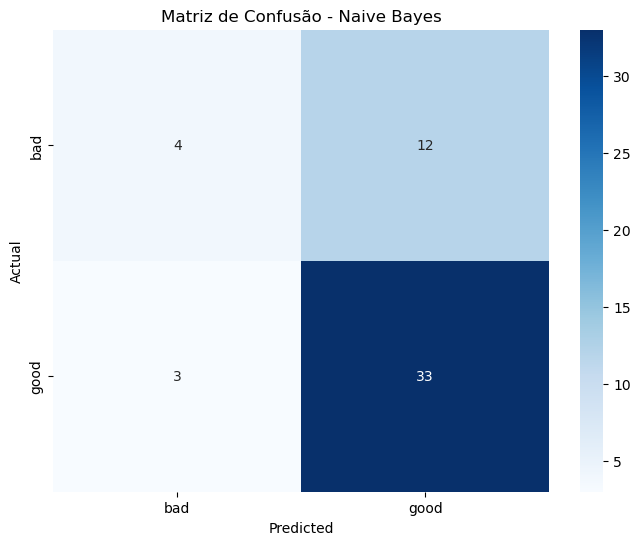

In [162]:
# Plotando a Matriz de Confusão para Naive Bayes
conf_matrix_nb = confusion_matrix(y_test_class, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [163]:
# 2. Modelo MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
mlp_model.fit(X_train_class, y_train_class)
y_pred_mlp = mlp_model.predict(X_test_class)

# Classification Report para MLPClassifier
print("\nClassification Report para MLPClassifier:")
print(classification_report(y_test_class, y_pred_mlp, target_names=le.classes_))



Classification Report para MLPClassifier:
              precision    recall  f1-score   support

         bad       1.00      0.31      0.48        16
        good       0.77      1.00      0.87        36

    accuracy                           0.79        52
   macro avg       0.88      0.66      0.67        52
weighted avg       0.84      0.79      0.75        52



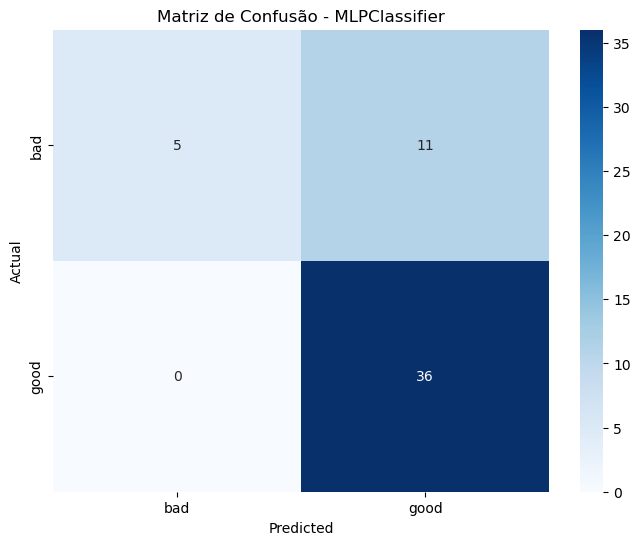

In [164]:
# Plotando a Matriz de Confusão para MLPClassifier
conf_matrix_mlp = confusion_matrix(y_test_class, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão - MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<br>

# 3 - Abordagem de Regressão

In [165]:
# Preparando os dados para regressão
X_reg = df[['Height', 'Gender']]
y_reg = df['Weight']

In [166]:
# Dividindo os dados para regressão
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [167]:
# Modelo XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train_reg, y_train_reg)
y_pred_xgb = xgb_model.predict(X_test_reg)

# Métricas para XGBoost Regressor
print("\nMétricas para XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_xgb):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_xgb):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test_reg, y_pred_xgb):.2f}")


Métricas para XGBoost Regressor:
Mean Squared Error (MSE): 4392.61
Mean Absolute Error (MAE): 31.58
Mean Absolute Percentage Error (MAPE): 0.23


<br>

## Salvamento dos modelos

In [168]:
import os

# Definindo o caminho para salvar os modelos
model_save_path = "C:\\Users\\dpaul\\OneDrive\\Documentos\\Heroes_Case_Alelo\\Models"

# Salvando o modelo K-Means
with open(os.path.join(model_save_path, 'kmeans_model.pkl'), 'wb') as file:
    pickle.dump(km_model, file)

# Salvando o modelo Naive Bayes
with open(os.path.join(model_save_path, 'naive_bayes_model.pkl'), 'wb') as file:
    pickle.dump(naive_bayes_model, file)

# Salvando o modelo MLPClassifier
with open(os.path.join(model_save_path, 'mlp_model.pkl'), 'wb') as file:
    pickle.dump(mlp_model, file)

# Salvando o modelo XGBoost Regressor
with open(os.path.join(model_save_path, 'xgb_model.pkl'), 'wb') as file:
    pickle.dump(xgb_model, file)

# Salvando o LabelEncoder
with open(os.path.join(model_save_path, 'label_encoder.pkl'), 'wb') as file:
    pickle.dump(le, file)

print(f"Modelos treinados e salvos com sucesso na pasta: {model_save_path}")

Modelos treinados e salvos com sucesso na pasta: C:\Users\dpaul\OneDrive\Documentos\Heroes_Case_Alelo\Models
